## Assignment 1 – CSCN8000 Artificial Intelligence Algorithms and Mathematics

### Student Name : Ramya Chandran
### Student Number : 8895789



1.	Given the symptoms exhibited in a patient and a database of anonymized patient records, predict whether the patient is likely to have an illness (Parkinson’s disease).
    A model of this decision problem could be used by a program to provide decision support to medical professionals.
  	
   You can follow the following steps :
  	
   •	Data Analysis
  	
   •	Data Preprocessing
  	
   •	Data Standardization
  	
   •	Model Training
  	
   •	Measure your model’s accuracy.
  	
      a.	Use 80% of samples as training data size.

   •	Build a predictive system to verify that the model built is able to predict the patient’s Parkinson’s disease with one instance of the dataset.
  	
You can download the Dataset from: https://archive.ics.uci.edu/dataset/470/parkinson+s+disease+classification  
Notes:
This lab should be submitted as a notebook and an HTML. Follow https://docs.github.com/en/pages/quickstart. 

In [30]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


In [3]:
# Load the dataset
df_speech = pd.read_csv('/Users/RC/Documents/AI_Algo/CSCN8000-lab-submissions/practical_labs/pd_speech_features.csv', header=1)

### Exploratory Data Analysis

In [31]:
# View the intial few records
df_speech.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [5]:
df_speech.columns

Index(['id', 'gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter',
       ...
       'tqwt_kurtosisValue_dec_28', 'tqwt_kurtosisValue_dec_29',
       'tqwt_kurtosisValue_dec_30', 'tqwt_kurtosisValue_dec_31',
       'tqwt_kurtosisValue_dec_32', 'tqwt_kurtosisValue_dec_33',
       'tqwt_kurtosisValue_dec_34', 'tqwt_kurtosisValue_dec_35',
       'tqwt_kurtosisValue_dec_36', 'class'],
      dtype='object', length=755)

In [6]:
# describe the dataset to know the variation 
df_speech.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [7]:
# Print information about the dataset
print(df_speech.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB
None


In [8]:
# Count of unique values in the 'class' column (target variable)
print(df_speech['class'].value_counts())

class
1    564
0    192
Name: count, dtype: int64


In [9]:
# Checking for missing values in each column
print(df_speech.isnull().sum())

id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64


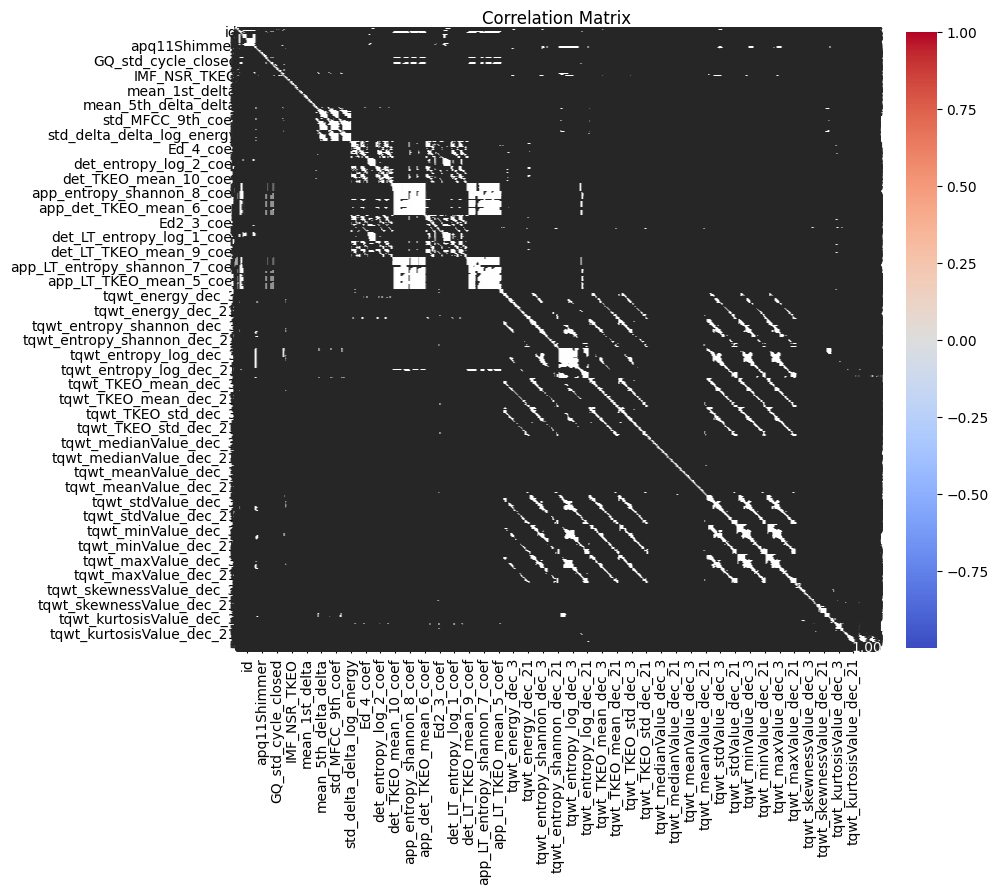

In [10]:
# Correlation matrix (for numerical columns only)
correlation_matrix = df_speech.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

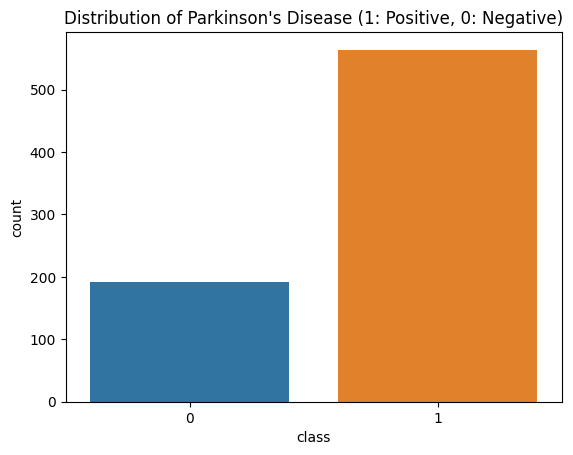

In [14]:
# Distribution of the target variable:
sns.countplot(x='class', data=df_speech)
plt.title('Distribution of Parkinson\'s Disease (1: Positive, 0: Negative)')
plt.show()

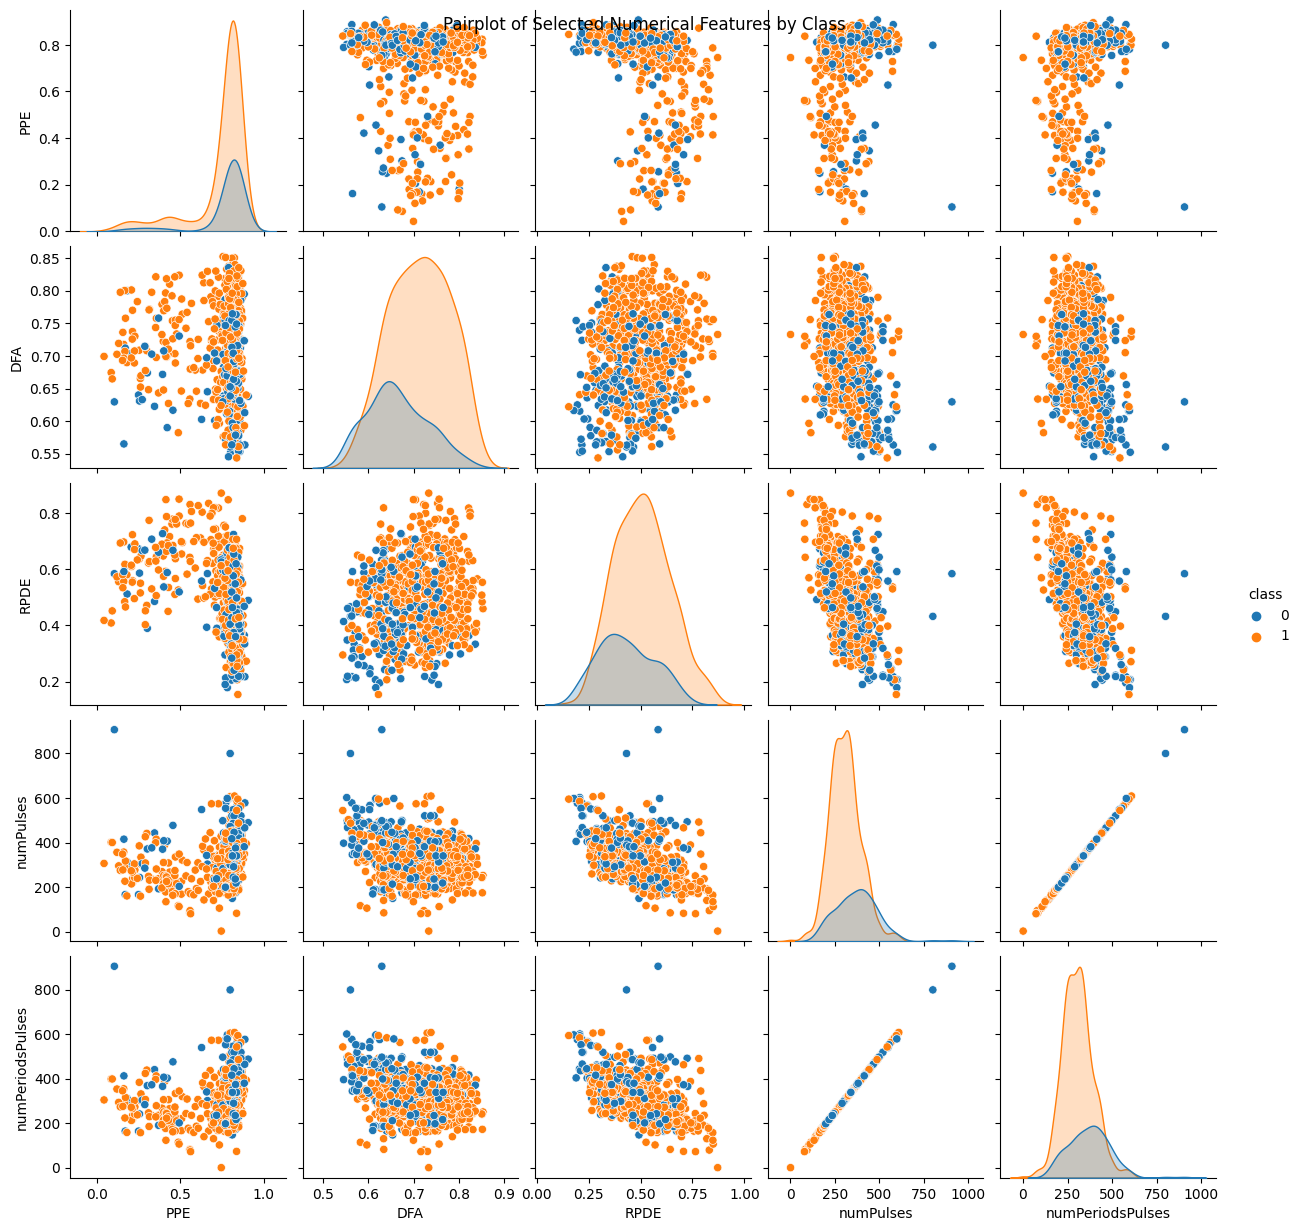

In [16]:
# Pairplot of some numerical features:
sns.pairplot(df_speech[['PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses', 'class']], hue='class')
plt.suptitle('Pairplot of Selected Numerical Features by Class')
plt.show()

### Data Preprocessing

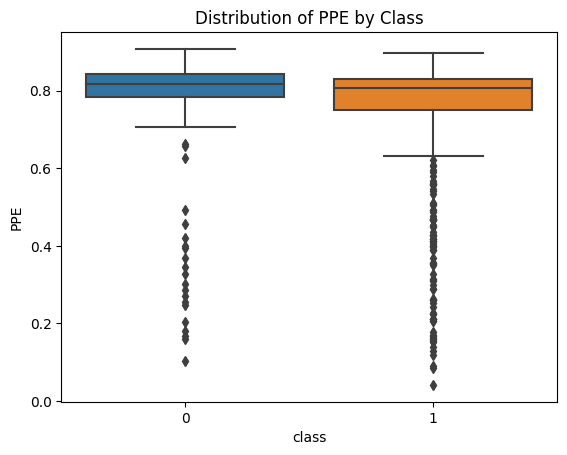

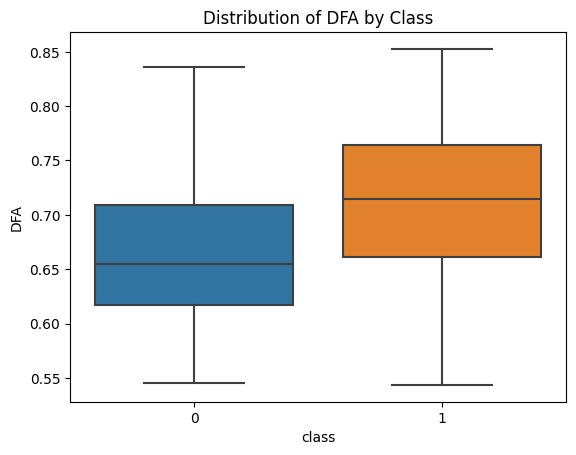

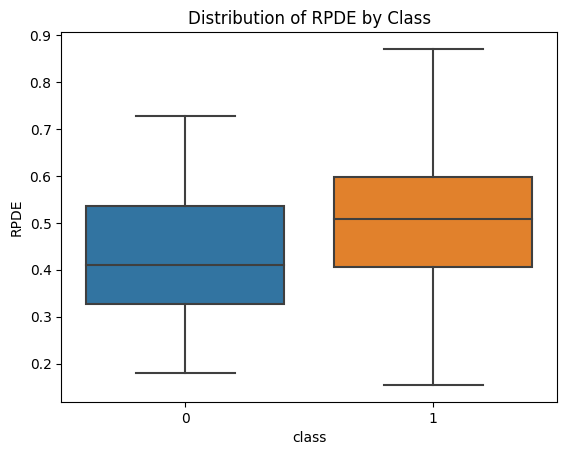

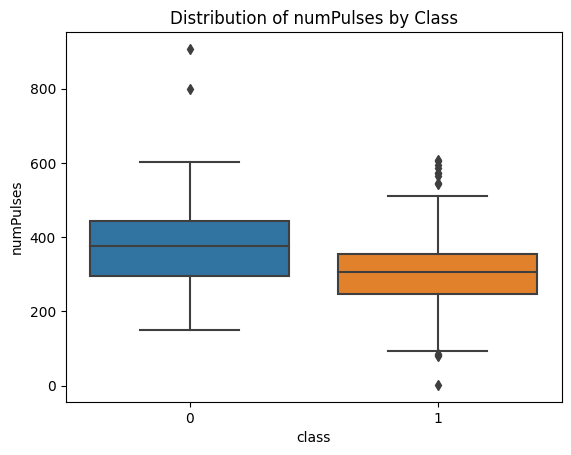

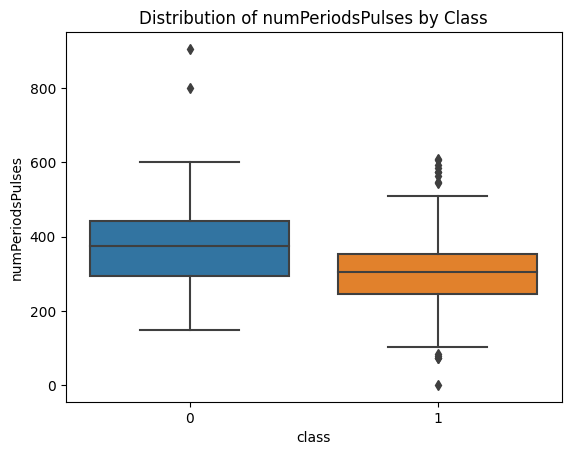

In [18]:
# Distribution of some numerical features by class:
numerical_features = ['PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses']
for feature in numerical_features:
    plt.figure()
    sns.boxplot(x='class', y=feature, data=df_speech)
    plt.title(f'Distribution of {feature} by Class')
    plt.show()

In [23]:
# Check for duplicates
duplicates = df_speech.duplicated()
print("Number of duplicate rows:", duplicates.sum())

# If you want to see the duplicate rows themselves, you can use the following:
duplicate_rows = df_speech[duplicates]
print(duplicate_rows)

# To drop duplicates and keep the first occurrence:
df_no_duplicates = df_speech.drop_duplicates(keep='first')

# To drop duplicates and keep the last occurrence:
df_speech = df_speech.drop_duplicates(keep='last')

# After dropping duplicates, you may want to reset the index:
df_speech.reset_index(drop=True, inplace=True)

# Now, df_no_duplicates contains the dataset with duplicates removed.


Number of duplicate rows: 1
     id  gender      PPE      DFA    RPDE  numPulses  numPeriodsPulses   
113  37       0  0.79067  0.58465  0.6425        321               320  \

     meanPeriodPulses  stdDevPeriodPulses  locPctJitter  ...   
113          0.006004            0.000143       0.00207  ...  \

     tqwt_kurtosisValue_dec_28  tqwt_kurtosisValue_dec_29   
113                       3.58                     4.0251  \

     tqwt_kurtosisValue_dec_30  tqwt_kurtosisValue_dec_31   
113                     2.9654                     3.8369  \

     tqwt_kurtosisValue_dec_32  tqwt_kurtosisValue_dec_33   
113                     4.2973                     3.6458  \

     tqwt_kurtosisValue_dec_34  tqwt_kurtosisValue_dec_35   
113                     3.1854                     3.7708  \

     tqwt_kurtosisValue_dec_36  class  
113                    10.0693      1  

[1 rows x 755 columns]


### Data Standardization

In [25]:
from sklearn.preprocessing import StandardScaler
# Separate the features (excluding 'id' and 'class' columns) for standardization
numerical_features = [col for col in df_speech.columns if col not in ['id', 'class']]
X = df_speech[numerical_features]

# Perform data standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled array back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=numerical_features)

# Combine the standardized features with the 'id' and 'class' columns
df_standardized = pd.concat([df_speech[['id', 'class']], X_scaled_df], axis=1)


### Model Training

In [26]:

# Split the data into features (X) and target variable (y)
X = df_standardized.drop(columns=['id', 'class'])
y = df_standardized['class']

# Split the dataset into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training using Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Model Training using Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)



/Users/RC/Documents/MLFoundation/CSCN8010/venv/CSCN8010_classic_ml/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier(random_state=42)

### Model Evaluation 

In [29]:
# Predictions on the test set
y_pred_logistic = logistic_model.predict(X_test)
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Model Accuracy
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)

print("Logistic Regression Accuracy:", accuracy_logistic)
print("Decision Tree Accuracy:", accuracy_decision_tree)

# Classification Report (Precision, Recall, F1-score, etc.)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logistic))

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_decision_tree))

Logistic Regression Accuracy: 0.8278145695364238
Decision Tree Accuracy: 0.8145695364238411
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.64      0.69        45
           1       0.86      0.91      0.88       106

    accuracy                           0.83       151
   macro avg       0.80      0.78      0.79       151
weighted avg       0.82      0.83      0.82       151

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69        45
           1       0.87      0.87      0.87       106

    accuracy                           0.81       151
   macro avg       0.78      0.78      0.78       151
weighted avg       0.81      0.81      0.81       151



For the given patient’s dataset with Parkinson’s disease the logistic regression performs slightly better than decision tree based on accuracy and precision. 